In [2]:
import matplotlib.pylab as pl
%matplotlib inline

Let's assume that we ask the reviewers to bet on the usefullness of an article. The question is *"how many articles will use the methods introduced in this article?"*
The reviewers is then be asked to give a prediction of how many articles within 1 year, 2 year, 3 year x.. with a standard deviation for each prediction.  This would effectively create a real time betting curve for each reviewer. Every hour/day, the market would resolve itself and attribute the earnings to all the winning reviewers. 

Reviewers can modify their future predictions, but by doing so they have to sell their position back to the market, which might be at a loss or as a gain.

In [3]:
import numpy as np
import math
from scipy.interpolate import interp1d
from scipy.special import erf
import matplotlib.pylab as pl
%matplotlib inline

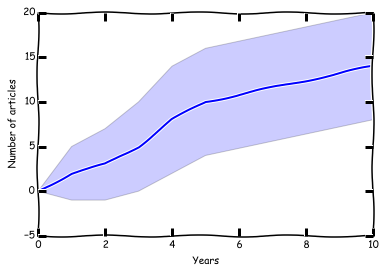

In [4]:
# illustration of what a predictive market would look like.
guess = np.array([
    # year, n_articles, std
    [ 0.0,  0.,          0.0001 ],
    [ 1.0,  2.,          3. ],
    [ 2.0,  3.,          4. ],
    [ 3.0,  5.,          5. ],
    [ 4.0,  8.,          6. ],
    [ 5.0,  10.,         6. ],
    [ 10.0, 14.,         6. ],
])

with pl.xkcd():
    pl.plot(guess[:,0], guess[:,1])
    pl.fill_between(guess[:,0], guess[:,1]-guess[:,2], guess[:,1]+guess[:,2], alpha=0.2)
    pl.xlabel('Years')
    pl.ylabel('Number of articles')

Definite integral of a normal distribution

In [5]:
normint = lambda a,b,mu,sigma: 0.5 * (erf((b - mu) / (np.sqrt(2.0)*sigma)) - erf((a - mu) / (np.sqrt(2.0)*sigma)))

In [6]:
Y,N = np.meshgrid(np.linspace(0.5, 10, 10), 
                  np.linspace(0, 50, 30))
dn = abs(N[0,0]-N[1,1])
imu = interp1d(guess[:,0],guess[:,1])
isig = interp1d(guess[:,0],guess[:,2])
P = normint(N.flatten(), N.flatten()+dn, imu(Y.flatten()), isig(Y.flatten()))
P = P.reshape(Y.shape)

Lets plot the difference between the predictions and the reported trend

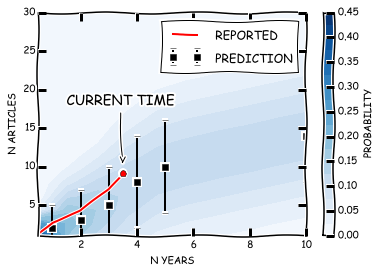

In [7]:
t = 3.5
x = np.linspace(0,t, 100)
scal = 1.4
with pl.xkcd():
    pl.set_cmap('Blues')
    pl.contourf(Y,N+dn/2.,P, 20)
    cb = pl.colorbar()
    pl.errorbar(guess[:,0], guess[:,1], guess[:,2], marker='s', ls='', c='k', label='PREDICTION')
    pl.plot(x, imu(x)*scal, label='REPORTED')
    pl.plot(t, imu(t)*scal,'ro')
    pl.ylabel('N ARTICLES')
    pl.xlabel('N YEARS')
    cb.set_label('PROBABILITY')
    pl.xlim([0.5, 10])
    pl.ylim([1, 30])   
    pl.legend()
    pl.annotate(
    'CURRENT TIME',
    xy=(t,imu(t)*scal+1), arrowprops=dict(arrowstyle='->'), xytext=(1.5, 18))
    #cb.set_clim([0.0,0.3])

In [8]:
pl.errorbar?

# Simulating a predictive market


### A naive approach

In [9]:
import pandas as pd

In [10]:
from datetime import datetime

In [11]:
class PredictiveMarket(object):
    def __init__(self, task):
        for k, v in task.items():
            setattr(self, k, v)
        
        self.positions_wannabe = []
        self.positions_players = []        
        #for o in range(len(self.possible_outcomes)):
        #    self.positions_wannabe.append({
        #            'name':'start',
        #            'outcome':o, 
        #            'amount':0.0, 
        #            'buy':1.0/len(self.possible_outcomes), 
        #            'sell':1.0, 
        #            'date':datetime.now()})
        #    self.positions_players.append({
        #            'name':'start',
        #            'outcome':o, 
        #            'amount':0.0, 
        #            'buy':1.0/len(self.possible_outcomes), 
        #            'sell':1.0, 
        #            'date':datetime.now()})
    
    def register_position(self, name, outcome, amount, buy, sell=0.95):
        """Register the position of a scientific bet
        Parameters:
        -----------
        outcome     (int) The index of the possible outcome
        amount      (float, min=0.0) How much money in EUR the user want to buy
        buy         (float, min=0.0, max=1.0) The maximum ratio at before which the user is ready to buy at
        sell        (float, min=0.0, max=1.0) The maximum ratio at after which the user is ready to sell at
        """
        self.positions_wannabe.append({
                'name':name,
                'outcome':outcome, 
                'amount':amount, 
                'buy':buy, 
                'sell':sell, 
                'date':datetime.now()})
        
    def resolve_positions(self):
        pass
        
    @property
    def wannabe(self):
        return pd.DataFrame(self.positions_wannabe)

    @property
    def players(self):
        return pd.DataFrame(self.positions_players)
    
    @property
    def market_value(self):
        if len(self.positions_players) == 0:
            return 0.0
        else:
            return self.players.amount.sum()
    
    def close_market(self):
        pass
        
            

## Creating a scientific task

Mark is reviewing an article. In this context he is doubting that a result can be reproduced. He therefore creates a scientific task around it.

In [12]:
result1_task1 = {
    'description': 'Attempt to reproduce the result 1 of this article',
    'doi': '10.1051/itmconf/20140201004',
    'reference': 'result 1, p. 4',
    'type': 'scientific task',
    'possible_outcomes': [
        'the result is reproducible',
        'the result is not reproducible'
        ]
}
pm_result1 = PredictiveMarket(result1_task1)

Mark then proceed to bet on the predicitve market that he has just created

In [13]:
pm_result1.register_position('Mark', 1, 50., 0.6, 0.95)
#pm_result1.register_position('Albert', 1, 10., 0.7, 0.95)
pm_result1.wannabe

,amount,buy,date,name,outcome,sell
0,50,0.6,2015-09-30 20:44:25.493591,Mark,1,0.95


Erik notices that there is a new predictive market that is of interest for him

In [14]:
print('Emergence: There is a new scientific task associated to DOI:%s: "%s"'%(pm_result1.doi, pm_result1.description))
print('Erik: hmmm interesting! I bet it is not goint to be reproducible')

Emergence: There is a new scientific task associated to DOI:10.1051/itmconf/20140201004: "Attempt to reproduce the result 1 of this article"
Erik: hmmm interesting! I bet it is not goint to be reproducible


Erik then proceeds to bet:

In [15]:
pm_result1.register_position('Erik', 0, 10., 0.7, 0.95)
pm_result1.register_position('Soeren', 0, 20., 0.6, 0.95)
pm_result1.wannabe

,amount,buy,date,name,outcome,sell
0,50,0.6,2015-09-30 20:44:25.493591,Mark,1,0.95
1,10,0.7,2015-09-30 20:44:25.525052,Erik,0,0.95
2,20,0.6,2015-09-30 20:44:25.525104,Soeren,0,0.95


The market booky is going to create the bet odds from there on. He will use the lowest probability as a starting point. Mark is ready to pay 50EUR at a probability of winning of 0.6. That means that if he wins, the booky would need to pay him.  

In [16]:
pos_mark = pm_result1.wannabe.query('name == "Mark"')
print("%2.2f EUR"%(pos_mark.amount/pos_mark.buy))

83.33 EUR


We try to maximize the market value, while keeping the probability as high as possible, without going over the constraints

In [17]:
from scipy.optimize import fmin_cobyla
import numpy as np

In [18]:
obj_func = lambda x: -x.sum()

In [19]:
x_init = np.ones(len(pm_result1.wannabe))

Create the constraints functions:

* $ A_i - x_i > 0$
* $ B_i - \frac{\Sigma_{i \in O_i}(x_i)}{\Sigma_(x_i)} $

In [20]:
cons = []
amount = pm_result1.wannabe.amount

# The x cannot be more than the specified amount
more_than_amount = lambda i: lambda x: amount[i] - x[i]
# The x cannot be less than 0
less_than_0 = lambda i: lambda x: x[i]
for i in range(len(df)):
    cons.append(more_than_amount(i))
    cons.append(less_than_0(i)) 

# If the outcome o wins, then the sum of all the payments shouldnt be bigger than the total sum of all the 
# money in the market
mv = pm_result1.market_value
ocs = pm_result1.wannabe.outcome.values
buy = df.buy.values
house_never_loses = lambda o: lambda x: mv + x.sum() - sum(x[ocs == o]/buy[ocs == o])

for o in range(len(pm_result1.possible_outcomes)):
    cons.append(house_never_loses(o))

NameError: name 'df' is not defined

Find maxima that maximize the prediction market

In [ ]:
x1 = fmin_cobyla(obj_func, x_init, cons)
print(x1)

In [ ]:
for i in range(len(cons)):
    print(i, cons[i](x1))

In [ ]:
for o in range(len(pm_result1.possible_outcomes)):
    print(o, x1[pm_result1.wannabe.outcome.values == o],
          df.buy.values[pm_result1.wannabe.outcome.values == o],
          x1[pm_result1.wannabe.outcome.values == o]/df.buy.values[pm_result1.wannabe.outcome.values == o],
          sum(x1[pm_result1.wannabe.outcome.values == o]/df.buy.values[pm_result1.wannabe.outcome.values == o]),
          sum(x1))

In [ ]:
def probabilities(x, df):
    for o in set(df.outcome.values):
        print(pm_result1.possible_outcomes[o],':', sum(x[df.outcome.values==o])/sum(x))
    

In [ ]:
probabilities(x1, pm_result1.wannabe)

In [ ]:
45/(45+10+20)

In [ ]:
60*0.6

In [ ]:
10/0.5 + 33.33

# The LS-LMSR model from Augur
Heavily inspired from this blog post: [Augur’s Automated Market Maker: The LS-LMSR](http://www.augur.net/blog/augur-s-automated-market-maker-the-ls-lmsr), By Dr. Abe Othman.

The cost function for the LMSR is given by:

$$
C(\textbf{q}) = b \log \left(\sum_{i=1}^n e^{\frac{q_i}{b}} \right)
$$
and the marginal prices on each event are given by the partial derivatives of the cost function:
$$
p_j(\textbf{q}) = \frac{e^{\frac{q_j}{b}}}{\sum_{i=1}^n e^{\frac{q_i}{b}}}
$$
where $b$, which is defined as a constant in the original LMSR model of Hanson, is here defined as a variable of **q**
$$
b(\textbf{q})=\alpha \sum_{i=1}^n q_i
$$

with $\alpha$ defined as

$$
\alpha = \frac{0.1}{n \log{n}}
$$
with $n$ being the number of dimensions of $\textbf{q}$

In [329]:
class LS_LMSRMarket(object):
    def __init__(self, task, vig=0.1, init=1.0):
        """
        Parameters
        ----------
        task    dict
                A dictionary describing the task for which the predictive market is created.
                Keys:
                -----
                type:               str 
                                    (e.g. 'scientific task')
                description:        str
                                    description of the task to be performed
                reference:          str
                                    Internal reference (e.g. 'result 1, p. 4')
                doi:                str
                                    DOI of the related publication
                possible_outcomes:  list
                                    List of strings describing the possible outcomes of the task
                                    
        vig     float
                parameter of the `alpha` variable used to calculate the `b` variable.
                Corresponds to the market "vig" value - typically between 5 and 30 percent in real-world markets
                
        init    float
                The initial subsidies of the market, spread equally in this algorithm on all the outcomes.
        
        """
        for k, v in task.items():
            setattr(self, k, v)
        self.init = init
        self.n = len(self.possible_outcomes)
        self._x = [np.ones([self.n])*init/self.n]
        self._book = []
        self.market_value = init
        self._history = []
        self.alpha = vig*self.n/np.log(self.n)
        
    def b(self, x):
        """Calculate the `b` equation: b=\alpha \Sigma x"""
        return self.alpha * x.sum()
        
    @property
    def book(self):
        return pd.DataFrame(self._book)
    
    @property
    def x(self):
        return self._x[-1].copy()
    
    def cost(self, x):
        return self.b(x)*np.log(np.exp(x/self.b(x)).sum())
    
    def _new_x(self, amount, outcome):
        new_x = self.x
        new_x[outcome] += amount        
        return new_x
            
    def price(self, amount, outcome):
        return self._price(self._new_x(amount, outcome))
        
    def _price(self, x):
        return self.cost(x)-self.cost(self.x)
    
    def register_x(self, x):
        self._x.append(x)
    
    def new_bet(self, name, paid, outcome):
        obj_func = lambda a: np.abs(self.price(a, outcome) - paid)
        owed = fmin_cobyla(obj_func, paid, [])
        if owed<paid:
            print('No, sorry the bet would be unfair!')
            return owed
        #price = self.price(amount, outcome)
        self.register_x(self._new_x(owed, outcome))
        self._book.append({'name':name, 'owed':owed, 'outcome':outcome, 'paid':paid})
        self._history.append(self.p)
        self.market_value += paid
        return owed

    @property
    def p(self):
        return np.exp(self.x/self.b(self.x))/np.exp(self.x/self.b(self.x)).sum()
    
    def history(self):
        return np.array(self._history)

In [330]:
np.log(np.exp(1.))

1.0

In [331]:
result1_task1

{'description': 'Attempt to reproduce the result 1 of this article',
 'doi': '10.1051/itmconf/20140201004',
 'possible_outcomes': ['the result is reproducible',
  'the result is not reproducible'],
 'reference': 'result 1, p. 4',
 'type': 'scientific task'}

In [332]:
pm = LS_LMSRMarket(result1_task1, init=10., vig=0.1)

In [333]:
pm.new_bet('Mark', 1., 0)
pm.new_bet('Erik', 3., 1)
pm.new_bet('Soeren', 1., 0)
pm.new_bet('Albert', 3., 1)

array(3.6746164062500006)

In [334]:
pm.market_value

18.0

In [335]:
pm.book

,name,outcome,owed,paid
0,Mark,0,1.33221953125,1
1,Erik,1,4.0828078125000005,3
2,Soeren,0,1.686667578125,1
3,Albert,1,3.6746164062500006,3


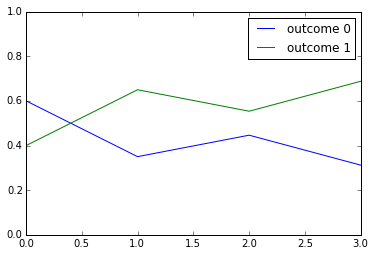

In [336]:
pl.plot(pm.history())
pl.ylim([0.,1.])
pl.legend(['outcome 0', 'outcome 1'])

### 100 Traders example

In [337]:
n = 100
outcome = 0.001
# The amount is assumed to increase linearly with time, as the market increases its liquidity
amount = np.random.random([n]) * 100. #* (1+np.arange(n))/(1.*n)
outcomes = np.zeros([n])
outcomes[np.random.random([n])<outcome] = 1.0

Creating the new task prediction market

In [338]:
pm = LS_LMSRMarket(result1_task1, init=10., vig=0.1)

Performing the bets

In [339]:
for i, a, o in zip(range(n),amount, outcomes):
    pm.new_bet('Trader-%d'%(i), a, int(o))

No, sorry the bet would be unfair!
No, sorry the bet would be unfair!
No, sorry the bet would be unfair!
No, sorry the bet would be unfair!
No, sorry the bet would be unfair!
No, sorry the bet would be unfair!
No, sorry the bet would be unfair!
No, sorry the bet would be unfair!
No, sorry the bet would be unfair!
No, sorry the bet would be unfair!
No, sorry the bet would be unfair!
No, sorry the bet would be unfair!
No, sorry the bet would be unfair!
No, sorry the bet would be unfair!
No, sorry the bet would be unfair!
No, sorry the bet would be unfair!
No, sorry the bet would be unfair!
No, sorry the bet would be unfair!
No, sorry the bet would be unfair!
No, sorry the bet would be unfair!
No, sorry the bet would be unfair!
No, sorry the bet would be unfair!
No, sorry the bet would be unfair!
No, sorry the bet would be unfair!
No, sorry the bet would be unfair!
No, sorry the bet would be unfair!
No, sorry the bet would be unfair!
No, sorry the bet would be unfair!
No, sorry the bet wo

One company comes along and bet sh*t ton of money

In [340]:
pm.new_bet('EvilMegaCorp', 1.E3, 1)

array(1013.3293015625)

The total to pay for each outcome

In [341]:
total = pm.book.groupby('outcome').sum()
total['house_wins'] = pm.market_value - total.owed
total

AttributeError: 'DataFrame' object has no attribute 'owed'

In [349]:
pm.book.groupby('outcome').sum()

,paid
outcome,
0,22.53699
1,1000.00000


Plot the market prediction history

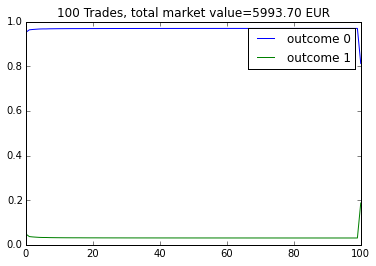

In [327]:
pl.plot(pm.history())
pl.ylim([0.,1.])
pl.legend(['outcome 0', 'outcome 1'])
pl.title('%d Trades, total market value=%2.2f EUR'%(n, pm.market_value))

The book of trades

In [328]:
book = pm.book
book['possible_win'] = pm.book.owed - pm.book.paid
book['p0'] = pm.history()[:,0]
book['p1'] = pm.history()[:,1]
book

,name,outcome,owed,paid,possible_win,p0,p1
0,Trader-0,0,62.25628687710523,61.283042,0.9732445,0.951942,0.048058
1,Trader-1,0,98.94011925382945,99.767944,-0.827825,0.963148,0.036852
2,Trader-2,0,48.572072226020104,48.996100,-0.4240281,0.964703,0.035297
3,Trader-3,0,58.876211326757485,59.393489,-0.5172781,0.965821,0.034179
4,Trader-4,0,89.68715556260987,90.478759,-0.7916039,0.966806,0.033194
5,Trader-5,0,62.188656095492505,62.738605,-0.5499488,0.967240,0.032760
6,Trader-6,0,8.800520658239893,8.878346,-0.077825,0.967291,0.032709
7,Trader-7,0,90.46583129378851,91.266901,-0.8010695,0.967714,0.032286
8,Trader-8,0,59.07660232034107,59.600240,-0.5236375,0.967919,0.032081
9,Trader-9,0,63.86217600834077,64.428394,-0.566218,0.968097,0.031903


In [237]:
pm.market_value

1012662.9992755557

In [229]:
pm.p

array([ 0.03134109,  0.96865891])